## Spyridon Kaperonis Text word count

- Import urllib and download the text file from gutenberg.org

In [0]:
#Get text data from url
import urllib.request
urllib.request.urlretrieve("https://www.gutenberg.org/files/56130/56130-h/56130-h.htm")

Out[15]: ('/tmp/tmp25vryq57', <http.client.HTTPMessage at 0x7f592af63950>)

- Import dbutils and add the file in data/Letters.txt path

In [0]:
from pyspark.dbutils import DBUtils
dbutils.fs.mv("file:/tmp/tmp25vryq57","dbfs:/data/Letters.txt")

Out[17]: True

In [0]:
letterRDD = sc.textFile("dbfs:/data/Letters.txt")

- Flatmap every line into words

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-1621814135091276> in <module> 
 ----> 1 parallelIt = sc . parallelize ( letterRDD , 4 ) 

 /databricks/spark/python/pyspark/context.py in parallelize (self, c, numSlices) 
 547 # Make sure we distribute data evenly if it's smaller than self.batchSize 
 548 if "__len__" not in dir ( c ) : 
 --> 549 c = list ( c ) # Make it a list so we can compute its length 
 550 serializer = self . init_batched_serializer ( c , numSlices ) 
 551 

 TypeError : 'RDD' object is not iterable

In [0]:
words_RDD = letterRDD.flatMap(lambda line: line.lower().strip().split(" "))

- Map words to (word,1) key value pairs

In [0]:
import re
letterPairsRDD = words_RDD.map(lambda word: re.sub(r'[^a-zA-Z]','',word))

In [0]:
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover()
stopwords = remover.getStopWords()
print(stopwords)
justWordsRDD = letterPairsRDD.filter(lambda word: word not in stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', "i'll", "you'll", "he'll", "she'll", "we'll", "they'll", "i'd", "you'd", "he'd", "she'd", "we'd", "they'd", "i'm", "you're", "he's", "she's", "it's", "we're", "they're", "i've", "we've", "you've", "they've", "isn't", "aren't", "wasn't", "weren't", "haven't", "hasn't", "hadn't", "don't", "doesn't", "didn't", "won't", "wouldn't", "shan't", "shouldn't", "mustn't", "can't", "couldn't", 'cannot', 'could', "here's", "how's", "let's", 'ought', "that's", "there's", "what's", "when's", "where's", "who's", "why's", 'would']

- Map words to key value pairs

In [0]:
kpairs = justWordsRDD.map(lambda word: (word,1))

- Reduce by key

In [0]:
letterWordCountRDD = kpairs.reduceByKey(lambda acc, value: acc + value)

- collect()

In [0]:
results = letterWordCountRDD.collect()
print(results)

[('html', 2), ('public', 7), ('xhtml', 1), ('', 1104), ('stricten', 1), ('httpwwwworgtrxhtmldtdxhtmlstrictdtd', 1), ('head', 7), ('httpequivcontenttype', 1), ('title', 4), ('project', 89), ('gutenberg', 32), ('ebook', 14), ('letters', 31), ('john', 10), ('muir', 9), ('style', 4), ('marginleft', 9), ('marginright', 5), ('hh', 1), ('textalign', 18), ('center', 12), ('clear', 12), ('h', 16), ('fontsize', 6), ('em', 40), ('fontweight', 2), ('lineheight', 1), ('marginbottom', 8), ('p', 1237), ('pagenum', 1), ('position', 4), ('absolute', 1), ('right', 16), ('smcap', 1), ('fontvariant', 1), ('smallcaps', 1), ('caption', 1), ('figcenter', 1), ('auto', 6), ('salutecontainer', 1), ('returncontainer', 1), ('returnaddress', 3), ('paddingleft', 3), ('textindent', 3), ('poetrycontainer', 1), ('fontsizeem', 2), ('tnbox', 1), ('px', 1), ('color', 3), ('pre', 4), ('use', 18), ('anyone', 5), ('anywhere', 4), ('united', 17), ('world', 24), ('restrictions', 2), ('whatsoever', 2), ('may', 76), ('give', 25), ('away', 27), ('reuse', 2), ('online', 6), ('check', 4), ('country', 7), ('using', 8), ('ezra', 3), ('carr', 28), ('language', 2), ('set', 17), ('encoding', 1), ('utf', 1), ('start', 10), ('produced', 5), ('rachael', 2), ('schultz', 2), ('team', 2), ('httpwwwpgdpnet', 2), ('generously', 2), ('internet', 2), ('archive', 15), ('div', 254), ('classtnbox', 1), ('notebp', 1), ('pinconsistencies', 1), ('punctuation', 1), ('spellingmdashsuch', 1), ('snelling', 3), ('inconsistent', 1), ('retained', 3), ('friendi', 1), ('classcenter', 17), ('mdash', 1), ('muirispan', 1), ('srcimagespubmarkjpg', 1), ('mark', 4), ('classsboston', 1), ('new', 30), ('classshoughton', 1), ('mifflin', 1), ('companyspanbr', 1), ('classsthe', 1), ('riverside', 2), ('copyright', 20), ('edition', 3), ('notei', 1), ('student', 1), ('university', 5), ('wisconsin', 7), ('house', 7), ('especially', 4), ('botanist', 1), ('felt', 8), ('young', 6), ('interests', 1), ('led', 6), ('formation', 5), ('lasting', 1), ('regarded', 2), ('indeed', 11), ('years', 20), ('sensitive', 2), ('spirit', 13), ('thoroughly', 3), ('understood', 1), ('sympathized', 1), ('revealing', 2), ('personality', 1), ('valley', 122), ('good', 39), ('notion', 1), ('intervals', 1), ('earn', 1), ('bread', 8), ('devoting', 1), ('self', 4), ('scientific', 6), ('glacial', 15), ('reverent', 1), ('pspan', 9), ('classreturncontainer', 76), ('classreturnaddress', 56), ('hollow', 5), ('january', 5), ('last', 64), ('quiet', 6), ('read', 22), ('interested', 1), ('description', 8), ('draw', 3), ('sermon', 1), ('speak', 12), ('like', 80), ('appreciated', 1), ('relished', 1), ('although', 7), ('page', 5), ('replete', 1), ('fall', 14), ('wonders', 1), ('love', 38), ('things', 13), ('attributes', 1), ('symptom', 1), ('confess', 1), ('take', 12), ('intense', 4), ('delight', 2), ('power', 6), ('bible', 1), ('two', 62), ('books', 7), ('however', 9), ('harmonize', 1), ('beautifully', 1), ('namepageaspan', 153), ('us', 33), ('employ', 1), ('faculties', 1), ('upon', 70), ('exercise', 2), ('simple', 5), ('living', 14), ('faith', 3), ('describe', 3), ('joyfully', 2), ('promised', 2), ('tomorrow', 8), ('ferns', 16), ('lichens', 3), ('sure', 17), ('must', 45), ('anybody', 3), ('others', 7), ('garden', 6), ('verdant', 2), ('bloom', 2), ('year', 17), ('took', 5), ('procured', 1), ('ten', 12), ('twelve', 7), ('moss', 4), ('liverworts', 2), ('thyme', 1), ('go', 53), ('long', 52), ('way', 39), ('far', 24), ('interesting', 4), ('orders', 2), ('glens', 1), ('canada', 8), ('ornamented', 1), ('lovely', 3), ('iaspidium', 2), ('common', 19), ('everywhere', 2), ('acrostichoidesi', 1), ('specimens', 10), ('aspidiums', 1), ('icystopteris', 1), ('grows', 3), ('shade', 4), ('lunarioidesi', 1), ('iosmunda', 1), ('regalisi', 1), ('localities', 1), ('near', 20), ('niagara', 1), ('falls', 38), ('iadiantumi', 1), ('trembles', 1), ('germanicai', 1), ('open', 12), ('ash', 2), ('icamptosorus', 1), ('iscolopendrium', 1), ('officinarumi', 1), ('amid', 13), ('wet', 6), (

## Charting

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [0]:
results.sort(key=lambda y:y[1])
wordCounter = Counter(results).most_common()
mostCommon = wordCounter[1:10]


Out[65]:

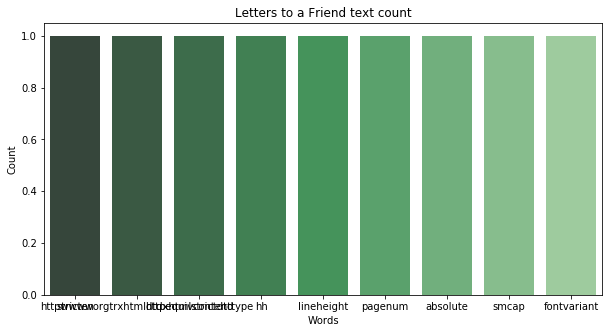

Text(0.5, 1.0, 'Letters to a Friend text count')

In [0]:
xlabel = 'Words'
ylabel = 'Count'
df = pd.DataFrame.from_records(mostCommon, columns=[xlabel, ylabel])


plt.figure(figsize=(10,3))
sns.barplot(xlabel, ylabel, data=df, palette="Greens_d").set_title("Letters to a Friend text count")